In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os

from scipy.stats import gaussian_kde

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array

In [2]:
ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\HK Joshi\\Documents\\Github\\major_project\\biocube'

In [3]:
def infinte_cube(img):

    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]    

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively 
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
    
    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape
    
    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively 
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

def inf_cube_with_itr(icwi_img, rot):
    icwi_template = icwi_img.copy()
    for _ in range(rot):
        icwi_template = infinte_cube(icwi_template)
    return icwi_template

def gen_batch_template(gbt_imgs):
    gbt_temp = []
    for gbt_img_temp in gbt_imgs:
        gbt_img_temp = np.array(gbt_img_temp, dtype= 'uint8')
        gbt_img_temp = inf_cube_with_itr(gbt_img_temp, rot)
        gbt_temp.append(gbt_img_temp)
    return gbt_temp

In [4]:
# Read all the dataset from directory
dataset_folder = 'LR-VERA-fingervein'
data_directory = os.path.join(ROOT_DIR, dataset_folder)

In [5]:
images = image_dataset_from_directory(
    data_directory,
    seed=42,
    batch_size=6, # Every dataset has 6 images
    image_size=(250,665),
    label_mode='int',
    shuffle=False
)

Found 1320 files belonging to 220 classes.


In [6]:
# Generate template for all images in dataset
temp_images = []
rot = 10
for imgs, labels in images.take(-1):
    temp = gen_batch_template(imgs)
    temp_images.append(temp)

In [7]:
temp_images = np.array(temp_images, dtype = 'uint8')
temp_images.shape

(220, 6, 250, 664, 3)

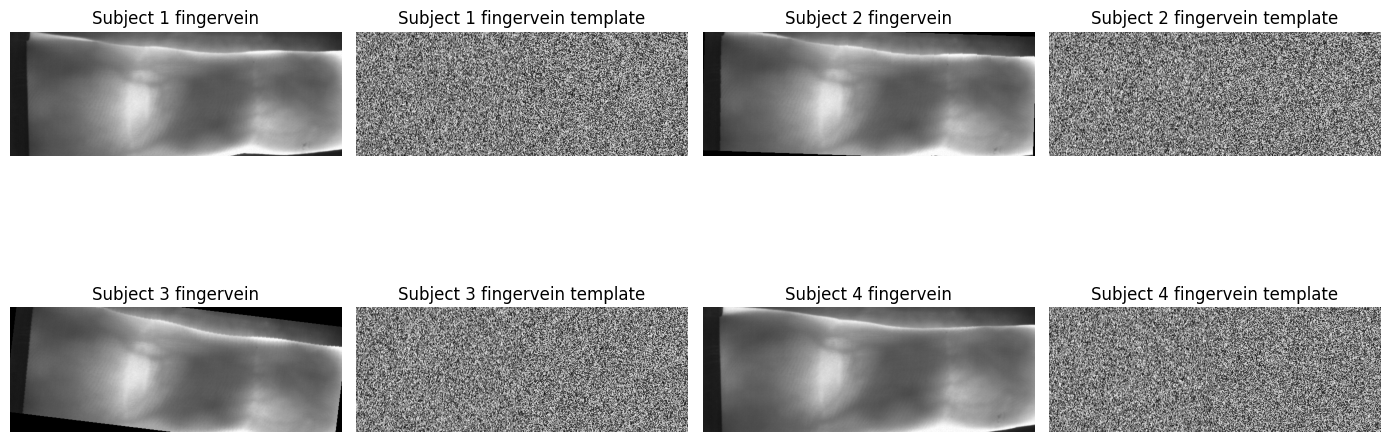

In [8]:
plt.figure(figsize=(14,7))
for imgs, labels in images.take(1):
    plt.subplot(241)
    plt.imshow(np.uint8(imgs[0]))
    plt.title('Subject 1 fingervein')
    plt.axis('off')
    
    plt.subplot(242)
    plt.imshow(temp_images[0][0])
    plt.title('Subject 1 fingervein template')
    plt.axis('off')
    
    plt.subplot(243)
    plt.imshow(np.uint8(imgs[1]))
    plt.title('Subject 2 fingervein')
    plt.axis('off')
    
    plt.subplot(244)
    plt.imshow(temp_images[0][1])
    plt.title('Subject 2 fingervein template')
    plt.axis('off')
    
    plt.subplot(245)
    plt.imshow(np.uint8(imgs[2]))
    plt.title('Subject 3 fingervein')
    plt.axis('off')
    
    plt.subplot(246)
    plt.imshow(temp_images[0][2])
    plt.title('Subject 3 fingervein template')
    plt.axis('off')
    
    plt.subplot(247)
    plt.imshow(np.uint8(imgs[3]))
    plt.title('Subject 4 fingervein')
    plt.axis('off')
    
    plt.subplot(248)
    plt.imshow(temp_images[0][3])
    plt.title('Subject 4 fingervein template')
    plt.axis('off')
    
    plt.tight_layout()

In [9]:
# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [ ]:
sample_templates = temp_images[:20]
similarity_scores_genuine = []
similarity_scores_impostor = []

for i, imgs in enumerate(sample_templates):
    for j, image_a_sp in enumerate(imgs):
        histogram_a_sp = cv2.calcHist([image_a_sp], channels=[0,1,2], mask=None, histSize=[256,256,256], ranges=[0, 256, 0, 256, 0, 256])
        histogram_a_sp = histogram_a_sp.flatten() / np.sum(histogram_a_sp)  # Normalize the histogram
        
        # Other templates of same person
        for k, image_b_sp in enumerate(imgs):
            if j == k:
                continue
            histogram_b_sp = cv2.calcHist([image_b_sp], channels=[0,1,2], mask=None, histSize=[256,256,256], ranges=[0, 256, 0, 256, 0, 256])
            histogram_b_sp = histogram_b_sp.flatten() / np.sum(histogram_b_sp)  # Normalize the histogram
            
#             similarity_score = cosine_similarity(histogram_a_sp, histogram_b_sp)
            similarity_score = cosine_similarity(image_a_sp.flatten(), image_b_sp.flatten())
#             similarity_score = np.corrcoef(image_a_sp.flatten(), image_b_sp.flatten())
            similarity_scores_genuine.append(similarity_score)
    
    # Other templates of different persons
    for k, other_temps in enumerate(sample_templates):
        if k == i:
            continue

        for image_b_dp in other_temps:
            histogram_b_dp = cv2.calcHist([image_b_dp], channels=[0,1,2], mask=None, histSize=[256,256,256], ranges=[0, 256, 0, 256, 0, 256])
            histogram_b_dp = histogram_b_dp.flatten() / np.sum(histogram_b_dp)  # Normalize the histogram
            
#             similarity_score = cosine_similarity(histogram_a_sp, histogram_b_dp)
            similarity_score = cosine_similarity(image_a_sp.flatten(), image_b_dp.flatten())
#             similarity_score = np.corrcoef(image_a_sp.flatten(), image_b_dp.flatten())
            similarity_scores_impostor.append(similarity_score)

In [ ]:
# Calculate KDE for similarity scores
kde_genuine = gaussian_kde(similarity_scores_genuine)
kde_impostor = gaussian_kde(similarity_scores_impostor)

# Generate range for similarity scores
x = np.linspace(0, 1, 100)

# Calculate frequency using KDE
frequency_genuine = kde_genuine(x)
frequency_impostor = kde_impostor(x)

# Plot PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, kde_genuine, color='b', label='Genuine')
plt.plot(x, kde_impostor, color='r', label='Impostor')
plt.title('Probability Density Function (PDF) of Genuine and Impostor Similarity Scores')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
frequency_impostor

In [ ]:
for imgs, labels in images.take(40):
    print(len[imgs[0]])
    
    break

## Feature Extraction

### CLAHE

In [ ]:
# plt.figure(figsize=(14,10))
clahe_imgs = []
for imgs, labels in images.take(50):    
    
    gb_img1 = np.array(imgs[0], dtype='uint8')
    gb_img2 = np.array(imgs[1], dtype='uint8')
    
    test_img1 = cv2.medianBlur(gb_img1, 11)
    test_img2 = cv2.medianBlur(gb_img2, 11)
    
# #     plt.subplot(321)
#     plt.imshow(test_img)
#     plt.title('image')
#     plt.axis('off')
#     plt.show()
    
# #     plt.subplot(322)
#     plt.hist(test_img.flat, bins=100, range=(0, 255))
#     plt.title('image histogram')
#     plt.show()
    
#     R, G, B = cv2.split(test_img)
#     output1_R = cv2.equalizeHist(R)
#     output1_G = cv2.equalizeHist(G)
#     output1_B = cv2.equalizeHist(B)
#     equ = cv2.merge((output1_R, output1_G, output1_B))
    
#     plt.subplot(323)
#     plt.imshow(equ)
#     plt.title('equalized image')
#     plt.axis('off')
    
#     plt.subplot(324)
#     plt.hist(equ.flat, bins=100, range=(0, 255))
#     plt.title('equalized histogram')
    
#     clahe1 = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(9,9))
#     clahe2 = cv2.createCLAHE(clipLimit =4.0, tileGridSize=(9,9))
#     clahe3 = cv2.createCLAHE(clipLimit =6.0, tileGridSize=(9,9))
    clahe = cv2.createCLAHE(clipLimit =8.0, tileGridSize=(9,9))
    
#     R, G, B = cv2.split(test_img)
#     CLAHEoutput1_R = clahe1.apply(R)
#     CLAHEoutput1_G = clahe1.apply(G)
#     CLAHEoutput1_B = clahe1.apply(B)
#     cl_img1 = cv2.merge((CLAHEoutput1_R, CLAHEoutput1_G, CLAHEoutput1_B))
    
#     R, G, B = cv2.split(test_img)
#     CLAHEoutput1_R = clahe2.apply(R)
#     CLAHEoutput1_G = clahe2.apply(G)
#     CLAHEoutput1_B = clahe2.apply(B)
#     cl_img2 = cv2.merge((CLAHEoutput1_R, CLAHEoutput1_G, CLAHEoutput1_B))
    
#     R, G, B = cv2.split(test_img)
#     CLAHEoutput1_R = clahe3.apply(R)
#     CLAHEoutput1_G = clahe3.apply(G)
#     CLAHEoutput1_B = clahe3.apply(B)
#     cl_img3 = cv2.merge((CLAHEoutput1_R, CLAHEoutput1_G, CLAHEoutput1_B))
    
    R1, G1, B1 = cv2.split(test_img1)
    CLAHEoutput_R1 = clahe4.apply(R1)
    CLAHEoutput_G1 = clahe4.apply(G1)
    CLAHEoutput_B1 = clahe4.apply(B1)
    
    R2, G2, B2 = cv2.split(test_img2)
    CLAHEoutput_R2 = clahe4.apply(R2)
    CLAHEoutput_G2 = clahe4.apply(G2)
    CLAHEoutput_B2 = clahe4.apply(B2)
    
    cl_img1 = cv2.merge((CLAHEoutput_R1, CLAHEoutput_G1, CLAHEoutput_B1))
    cl_img2 = cv2.merge((CLAHEoutput_R2, CLAHEoutput_G2, CLAHEoutput_B2))
    
# #     plt.subplot(325)
#     plt.imshow(np.uint8(cl_img1))
#     plt.title('CLAHE image')
#     plt.axis('off')
#     plt.show()
    
# # #     plt.subplot(326)
# #     plt.hist(cl_img1.flat, bins=100, range=(0, 255))
# #     plt.title('CLAHE image histogram')
# #     plt.show()
    
#     #     plt.subplot(325)
#     plt.imshow(np.uint8(cl_img2))
#     plt.title('CLAHE image')
#     plt.axis('off')
#     plt.show()
    
# # #     plt.subplot(326)
# #     plt.hist(cl_img2.flat, bins=100, range=(0, 255))
# #     plt.title('CLAHE image histogram')
# #     plt.show()
    
#     #     plt.subplot(325)
#     plt.imshow(np.uint8(cl_img3))
#     plt.title('CLAHE image')
#     plt.axis('off')
#     plt.show()
    
# #     plt.subplot(326)
#     plt.hist(cl_img3.flat, bins=100, range=(0, 255))
#     plt.title('CLAHE image histogram')
#     plt.show()

    clahe_imgs.append([cl_img1, cl_img2])
    
#     #     plt.subplot(325)
#     plt.imshow(np.uint8(cl_img4))
#     plt.title('CLAHE image')
#     plt.axis('off')
#     plt.show()
    
# #     plt.subplot(326)
#     plt.hist(cl_img4.flat, bins=100, range=(0, 255))
#     plt.title('CLAHE image histogram')
#     plt.show()

    plt.tight_layout()

In [ ]:
tmp11 = clahe_imgs[0][0].copy()
tmp12 = clahe_imgs[0][1].copy()
tmp21 = clahe_imgs[1][0].copy()
tmp22 = clahe_imgs[1][1].copy()

gray11 = cv2.cvtColor(tmp11, cv2.COLOR_BGR2GRAY)
gray12 = cv2.cvtColor(tmp12, cv2.COLOR_BGR2GRAY)
gray21 = cv2.cvtColor(tmp21, cv2.COLOR_BGR2GRAY)
gray22 = cv2.cvtColor(tmp22, cv2.COLOR_BGR2GRAY)


plt.imshow(tmp11)
plt.show()
plt.imshow(tmp12)
plt.show()
plt.imshow(tmp21)
plt.show()
plt.imshow(tmp22)
plt.show()


# create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

# detect features from the image
# keypoints11, descriptors = sift.detectAndCompute(tmp11, None)
keypoints11, descriptors11 = sift.detectAndCompute(tmp11, None)
keypoints12, descriptors12 = sift.detectAndCompute(tmp12, None)
keypoints21, descriptors21 = sift.detectAndCompute(tmp21, None)
keypoints22, descriptors22 = sift.detectAndCompute(tmp22, None)

# draw the detected key points
sift_image11 = cv2.drawKeypoints(gray11, keypoints, tmp11)
sift_image12 = cv2.drawKeypoints(gray12, keypoints, tmp12)
sift_image21 = cv2.drawKeypoints(gray21, keypoints, tmp21)
sift_image22 = cv2.drawKeypoints(gray22, keypoints, tmp22)

# show the image
plt.imshow(sift_image11)
plt.show()

plt.imshow(sift_image12)
plt.show()

plt.imshow(sift_image21)
plt.show()

plt.imshow(sift_image22)
plt.show()

# # save the image
# cv2.imwrite("table-sift.jpg", sift_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# match descriptors of both images
matches11_12 = bf.match(descriptors11, descriptors12)
matches11_21 = bf.match(descriptors11, descriptors21)
matches21_22 = bf.match(descriptors21, descriptors22)

# matches11_12 = bf.knnMatch(descriptors11, descriptors12, k=2)
# matches11_21 = bf.knnMatch(descriptors11, descriptors21, k=2)
# matches21_22 = bf.knnMatch(descriptors21, descriptors22, k=2)

In [ ]:
plt.imshow(descriptors11)
plt.show()

plt.imshow(descriptors12)
plt.show()

plt.imshow(descriptors21)
plt.show()

plt.imshow(descriptors22)
plt.show()

In [ ]:
# sort matches by distance
matches11_12 = sorted(matches11_12, key = lambda x:x.distance)
matches11_21 = sorted(matches11_21, key = lambda x:x.distance)
matches21_22 = sorted(matches21_22, key = lambda x:x.distance)

# # Apply ratio test
# good11_12 = []
# good11_21 = []

# for m,n in matches11_12:
#     if m.distance < 0.75*n.distance:
#         good11_12.append(m)

# for m,n in matches11_21:
#     if m.distance < 0.75*n.distance:
#         good11_21.append(m)


# draw first 50 matches
matched_img11_12 = cv2.drawMatches(tmp11, keypoints11, tmp12, keypoints12, matches11_12, tmp12, flags=2)
matched_img11_21 = cv2.drawMatches(tmp11, keypoints11, tmp21, keypoints21, matches11_21, tmp21, flags=2)
matched_img21_22 = cv2.drawMatches(tmp21, keypoints21, tmp22, keypoints22, matches21_22, tmp22, flags=2)

In [ ]:
plt.figure(figsize=(14,10))

# show the image
plt.imshow(matched_img11_12)
plt.axis('off')
plt.show()

plt.figure(figsize=(14,10))
plt.imshow(matched_img11_21)
plt.axis('off')
plt.show()

plt.figure(figsize=(14,10))
plt.imshow(matched_img21_22)
plt.axis('off')
plt.show()

### GRAY IMAGE ---NOT NEEDED---

In [ ]:

# plt.figure(figsize=(14,10))

for imgs, labels in images.take(1):    
    
    test_img = np.array(imgs[0], dtype='uint8')
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    
#     plt.subplot(321)
#     plt.imshow(gray_img)
#     plt.title('image')
#     plt.axis('off')

#     plt.subplot(322)
#     plt.hist(gray_img.flat, bins=100, range=(0, 255))
#     plt.title('image histogram')
    
#     equ = cv2.equalizeHist(gray_img)
    
#     plt.subplot(323)
#     plt.imshow(equ)
#     plt.title('equalized iamge')
#     plt.axis('off')
    
#     plt.subplot(324)
#     plt.hist(equ.flat, bins=100, range=(0, 255))
#     plt.title('equalized histogram')
    
    clahe1 = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(3,3))
    cl_img1 = clahe1.apply(gray_img.copy())
    
    clahe2 = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
    cl_img2 = clahe2.apply(gray_img.copy())
    
    clahe3 = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(15,15))
    cl_img3 = clahe3.apply(gray_img.copy())
    
    clahe4 = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(25,25))
    cl_img4 = clahe4.apply(gray_img.copy())
    
#     plt.subplot(325)
    plt.imshow(np.uint8(cl_img1))
    plt.title('CLAHE image')
    plt.axis('off')
    plt.show()
    
#     plt.subplot(326)
    plt.hist(cl_img1.flat, bins=100, range=(0, 255))
    plt.title('CLAHE image histogram')
    plt.show()
    
    #     plt.subplot(325)
    plt.imshow(np.uint8(cl_img2))
    plt.title('CLAHE image')
    plt.axis('off')
    plt.show()
    
#     plt.subplot(326)
    plt.hist(cl_img2.flat, bins=100, range=(0, 255))
    plt.title('CLAHE image histogram')
    plt.show()

    #     plt.subplot(325)
    plt.imshow(np.uint8(cl_img3))
    plt.title('CLAHE image')
    plt.axis('off')
    plt.show()
    
#     plt.subplot(326)
    plt.hist(cl_img3.flat, bins=100, range=(0, 255))
    plt.title('CLAHE image histogram')
    plt.show()

    #     plt.subplot(325)
    plt.imshow(np.uint8(cl_img4))
    plt.title('CLAHE image')
    plt.axis('off')
    plt.show()
    
#     plt.subplot(326)
    plt.hist(cl_img4.flat, bins=100, range=(0, 255))
    plt.title('CLAHE image histogram')
    plt.show()

    plt.tight_layout()
    break

In [ ]:
tmp11 = cl_img1.copy()
plt.imshow(tmp11)
plt.show()
print(tmp11.shape)
ret, thresh1 = cv2.threshold(tmp11, 40, 70, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(tmp11, 40, 70, cv2.THRESH_BINARY_INV)

plt.imshow(thresh1)
plt.show()
plt.imshow(thresh1)
plt.show()

### Gabor

In [ ]:
def get_image_energy(pixels):
    """
    :param pixels: image array
    :return: Energy content of the image
    """
    _, (cH, cV, cD) = dwt2(pixels.T, 'db1')
    energy = (cH ** 2 + cV ** 2 + cD ** 2).sum() / pixels.size
    return energy


def get_energy_density(pixels):
    """
    :param pixels: image array
    :param size: size of the image
    :return: Energy density of the image based on its size
    """
    energy = get_image_energy(pixels)
    energy_density = energy / (pixels.shape[0]*pixels.shape[1])
    return round(energy_density*100,5) # multiplying by 100 because the values are very small

def get_magnitude(response):
    """
    :param response: original gabor response in the form: [real_part, imag_part] 
    :return: the magnitude response for the input gabor response
    """
    magnitude = np.array([np.sqrt(response[0][i][j]**2+response[1][i][j]**2)
                        for i in range(len(response[0])) for j in range(len(response[0][i]))])
    return magnitude

def apply_pca(array):
    """
    :param array: array of shape pXd
    :return: reduced and transformed array of shape dX1
    """
    # apply dimensionality reduction to the input array
    standardized_data = StandardScaler().fit_transform(array)
    pca = PCA(n_components=1)
    pca.fit(standardized_data)
    transformed_data = pca.transform(standardized_data)
    return transformed_data



In [ ]:
def applygabor(image):
#     image = Image.open(image1).convert('RGB')
    image_size = image.size
    print(image_size)
    display(image)
    converter = ImageEnhance.Color(image)
    image = converter.enhance(0.5) #enchance color by a factor of 0.5
    image = enhance_brightness(image)
    # convert to grayscale
    image = image.convert('L')
    display(image)
    pixels = np.asarray(image, dtype="int32")
    energy_density = get_energy_density(pixels)
    
    # get fixed bandwidth using energy density
    bandwidth = abs(0.4*energy_density - 0.5)
    magnitude_dict = {}
    for theta in np.arange(0, np.pi, np.pi / 6):
        for freq in np.array([1.4142135623730951, 2.414213562373095, 2.8284271247461903, 3.414213562373095]): 
            filt_real, filt_imag = gabor(image, frequency=freq, bandwidth=bandwidth, theta=theta)
            # get magnitude response
            magnitude = get_magnitude([filt_real, filt_imag])
            ''' uncomment the lines below to visualize each magnitude response '''
            im = Image.fromarray(magnitude.reshape(image_size)).convert('L')
            display(im)
            magnitude_dict[(theta, freq)] = magnitude.reshape(image.size)
        # apply gaussian smoothing
    gabor_mag = []
    for key, values in magnitude_dict.items():
        # the value of sigma is chosen to be half of the applied frequency
        sigma = 0.5*key[1]
        smoothed = gaussian(values, sigma = sigma)
        gabor_mag.append(smoothed)
    gabor_mag = np.array(gabor_mag)

    # reshape so that we can apply PCA
    value = gabor_mag.reshape((-1, image_size[0]*image_size[1]))

    # get dimensionally reduced image
    pcaed = apply_pca(value.T).astype(np.uint8)
    result = pcaed.reshape((image_size[0], image_size[1]))
    result_im = Image.fromarray(result, mode='L')
    display(result_im)

In [ ]:
# GABOR FILTER
# prepare filter bank kernels
from skimage.filters import gabor_kernel

kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))

            kernels.append(kernel)

In [ ]:
from PIL import Image, ImageEnhance

threshold_value = 120
# plt.figure(figsize=(14,7))
for imgs, labels in images.take(1):    
    
    test_img = np.array(imgs[0], dtype='uint8')
    print(test_img.size)
    applygabor(test_img)
#     gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    
# #     blurred = cv2.GaussianBlur(test_img, ksize=(3, 3), sigmaX=0.5)  
#     blurred = cv2.blur(test_img, (17, 17))
#     # Perform Canny edge detection
#     edges = cv2.Canny(blurred, 30, 7)
    
#     plt.imshow(np.uint8(imgs[0]))
#     plt.title('image')
#     plt.show()
    
# #     plt.imshow(gray)
# #     plt.title('gray image')
# #     plt.show()
#     histg = cv2.calcHist([test_img],[2],None,[256],[0,256]) 
#     plt.hist(histg.ravel(), bins=(256, 256)) 
#     plt.show()
    
#     plt.imshow(np.uint8(blurred))
#     plt.title('blurred img')
#     plt.show()
    
# #     plt.imshow(np.uint8(abs(blurred - np.array(imgs[0]))))
# #     plt.title('difference')
# #     plt.show()
#     _, imgA=cv2.connectedComponents(gray)
#     plt.imshow(imgA)
#     plt.title('imgA')
#     plt.show()
    
    
#     plt.imshow(edges)
#     plt.title('edges')
#     plt.show()
    
    
    break